In [71]:
import cupy as cp

In [72]:
# Relu activation function
class ReLU:

    # Initialize
    def __init__(self):
        self.outputs = None

    # forward pass
    def forward(self, inputs):
        self.outputs = cp.maximum(0, inputs)
        return self.outputs

In [73]:
class Softmax:
    def __init__(self):
        self.outputs = None

    def forward(self, inputs):
        inputs = cp.exp(inputs - cp.max(inputs, axis=1,
                                        keepdims=True))
        inputs = inputs / cp.sum(inputs, axis=1, keepdims=True)
        self.outputs = inputs
        return inputs

In [74]:
class DenseLayer:
    def __init__(self, num_inputs, num_neurons):
        self.op = None
        self.weights = 0.1 * cp.random.rand(num_inputs, num_neurons)
        self.biases = cp.zeros((1, num_neurons))

    def forward(self, x):
        self.op = cp.dot(x, self.weights) + self.biases
        return self.op

In [75]:
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()

In [76]:
x, y = spiral_data(samples=100, classes=3)

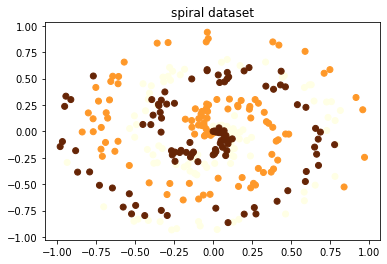

In [77]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="YlOrBr")
plt.title("spiral dataset");

In [78]:
fc1 = DenseLayer(2, 3)

In [79]:
act1 = ReLU()

In [80]:
x = cp.array(x)
y = cp.array(y)

In [81]:
op = fc1.forward(x)

In [82]:
output = act1.forward(op)

In [83]:
print(output[:5])

[[0.         0.         0.        ]
 [0.00015309 0.00059687 0.00085822]
 [0.00059672 0.00127794 0.00211855]
 [0.00131318 0.00139439 0.00300342]
 [0.00173055 0.00200251 0.00415097]]


In [84]:
act2 = Softmax()
output = act2.forward(op)

In [85]:
output[:5]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33320569, 0.33335359, 0.33344072],
       [0.33308858, 0.33331556, 0.33359587],
       [0.33313646, 0.33316352, 0.33370002],
       [0.33303412, 0.3331247 , 0.33384118]])